In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
# from sklearn.datasets import load_wine
from IPython.display import SVG
# from graphviz import Source
from IPython.display import display
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

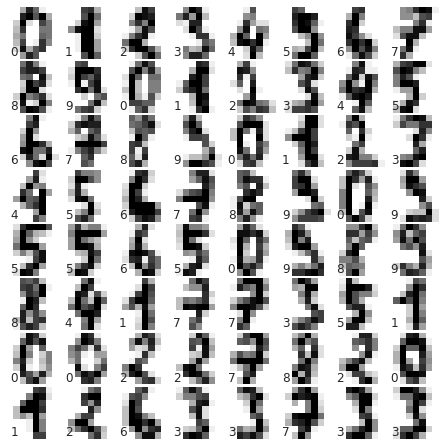

In [22]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [64]:

# feature matrix
X = digits.data

# target vector
y = digits.target

# class labels
# labels = digits.feature_names
print(X.shape)
# print dataset description
print(digits.DESCR)



(1797, 64)
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each e

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=101)
estimator = DecisionTreeClassifier()
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
pred = estimator.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[65  0  1  0  1  0  0  0  0  2]
 [ 0 54  2  1  2  2  1  2  5  0]
 [ 1  3 49  5  0  0  2  0  3  2]
 [ 0  3  5 63  1  0  0  1  1  2]
 [ 1  1  1  1 70  0  2  2  0  0]
 [ 1  2  1  5  1 61  0  0  1  4]
 [ 3  0  1  0  0  2 58  0  0  0]
 [ 0  1  0  3  3  0  0 64  0  0]
 [ 0  3  4  3  5  0  0  0 61  2]
 [ 0  4  2  3  1  0  0  1  3 59]]
             precision    recall  f1-score   support

          0       0.92      0.94      0.93        69
          1       0.76      0.78      0.77        69
          2       0.74      0.75      0.75        65
          3       0.75      0.83      0.79        76
          4       0.83      0.90      0.86        78
          5       0.94      0.80      0.87        76
          6       0.92      0.91      0.91        64
          7       0.91      0.90      0.91        71
          8       0.82      0.78      0.80        78
          9       0.83      0.81      0.82        73

avg / total       0.84      0.84      0.84       719



In [61]:
from helpers import visualize_classifier
from helpers import plot_tree_interactive
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X_train, y_train)
pred = bag.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
# visualize_classifier(bag, X, y)

[[68  0  0  0  1  0  0  0  0  0]
 [ 0 65  2  0  0  0  0  1  1  0]
 [ 1  0 64  0  0  0  0  0  0  0]
 [ 0  0  0 72  0  0  0  2  1  1]
 [ 0  1  0  0 74  1  0  2  0  0]
 [ 0  0  0  1  1 73  0  0  0  1]
 [ 1  1  0  0  1  0 61  0  0  0]
 [ 0  0  0  0  2  0  0 69  0  0]
 [ 0  4  2  0  0  0  0  1 70  1]
 [ 0  0  1  1  0  1  0  1  2 67]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98        69
          1       0.92      0.94      0.93        69
          2       0.93      0.98      0.96        65
          3       0.97      0.95      0.96        76
          4       0.94      0.95      0.94        78
          5       0.97      0.96      0.97        76
          6       1.00      0.95      0.98        64
          7       0.91      0.97      0.94        71
          8       0.95      0.90      0.92        78
          9       0.96      0.92      0.94        73

avg / total       0.95      0.95      0.95       719



In [63]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
# visualize_classifier(model, X, y);
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[68  0  0  0  1  0  0  0  0  0]
 [ 0 67  0  0  0  1  0  0  1  0]
 [ 0  0 65  0  0  0  0  0  0  0]
 [ 0  0  0 74  0  0  0  2  0  0]
 [ 0  0  0  0 76  0  0  2  0  0]
 [ 0  0  0  0  1 74  0  0  0  1]
 [ 1  1  0  0  0  0 61  0  1  0]
 [ 0  0  0  0  0  0  0 70  1  0]
 [ 0  4  0  1  0  0  0  1 72  0]
 [ 0  0  0  1  0  1  0  0  1 70]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99        69
          1       0.93      0.97      0.95        69
          2       1.00      1.00      1.00        65
          3       0.97      0.97      0.97        76
          4       0.97      0.97      0.97        78
          5       0.97      0.97      0.97        76
          6       1.00      0.95      0.98        64
          7       0.93      0.99      0.96        71
          8       0.95      0.92      0.94        78
          9       0.99      0.96      0.97        73

avg / total       0.97      0.97      0.97       719



In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [77]:
pred = knn.predict(X_test)

In [73]:
print(confusion_matrix( y_test, pred))
print(classification_report(y_test, pred))

[[68  0  0  0  1  0  0  0  0  0]
 [ 0 67  0  0  0  1  0  0  1  0]
 [ 0  0 65  0  0  0  0  0  0  0]
 [ 0  0  0 74  0  0  0  2  0  0]
 [ 0  0  0  0 76  0  0  2  0  0]
 [ 0  0  0  0  1 74  0  0  0  1]
 [ 1  1  0  0  0  0 61  0  1  0]
 [ 0  0  0  0  0  0  0 70  1  0]
 [ 0  4  0  1  0  0  0  1 72  0]
 [ 0  0  0  1  0  1  0  0  1 70]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99        69
          1       0.93      0.97      0.95        69
          2       1.00      1.00      1.00        65
          3       0.97      0.97      0.97        76
          4       0.97      0.97      0.97        78
          5       0.97      0.97      0.97        76
          6       1.00      0.95      0.98        64
          7       0.93      0.99      0.96        71
          8       0.95      0.92      0.94        78
          9       0.99      0.96      0.97        73

avg / total       0.97      0.97      0.97       719



In [80]:
import numpy as np
error_rate = []
grid_err = 1
opt_k = 1
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    err = np.mean(pred_i != y_test)
    error_rate.append(err)
    if grid_err < err:
        grid_err = err  
        opt_k = i

1


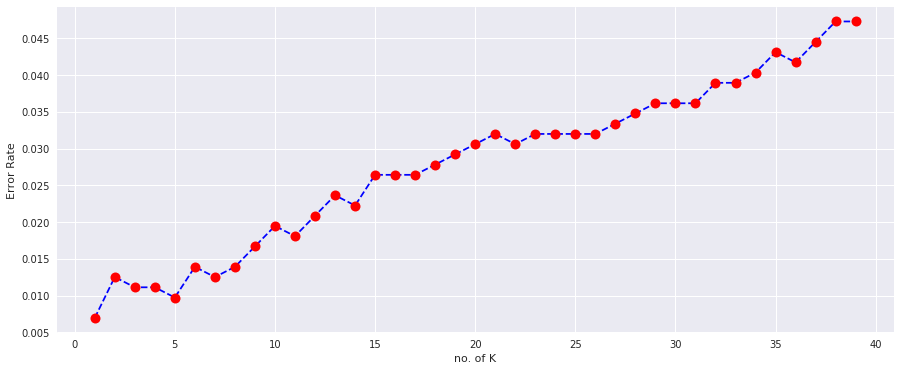

In [81]:
plt.figure(figsize=(15,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of K')
plt.ylabel('Error Rate')
print(opt_k)